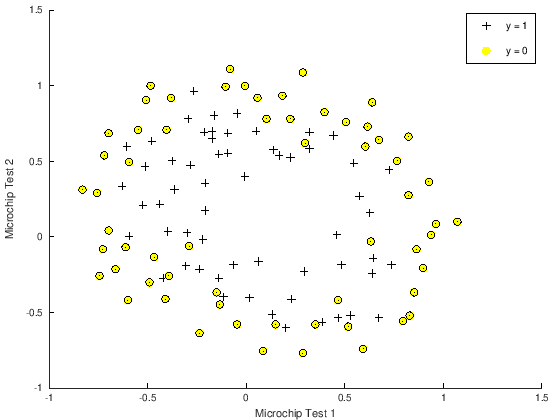

In [29]:
function plotData(X, y)
    % Create New Figure
    figure; hold on;

    % finds indexes of positive datapoints and negative datapoints
    pos = find(y==1);
    neg = find(y==0);

    plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, ...
    'MarkerSize', 7);
    plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', ...
    'MarkerSize', 7);
    
    hold off;
end

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).
data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

In [30]:
function out = mapFeature(X1, X2)
%   MAPFEATURE(X1, X2) maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end

In [31]:
function g = sigmoid(z)

g = zeros(size(z));
[m,n] = size(z);

for i=1:m,
    for j=1:n,
        g(i,j) = 1/(1+exp(-z(i,j)));
    end;
end;


end

In [32]:
%% =========== Part 1: Regularized Logistic Regression ============

% loading data again for convenience/preventing a bug 
data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

function [J, grad] = costFunctionReg(theta, X, y, lambda)
    m = length(y); % number of training examples
    
    J = 0;
    grad = zeros(size(theta));
    thetaZero = theta;
    thetaZero(1) = 0;
    h_theta = sigmoid(X*theta);
    
    % COST
    J = (1/m) * ((-y'*log(h_theta))-(1-y)'*(log(1-h_theta))) + ((lambda/(2*m))*theta(2:end)'*theta(2:end));
    % GRADIENT
    grad = ((1/m)*X'*(h_theta-y)) + ((lambda/m)*thetaZero);
end

% Add Polynomial Features
% maps 2 input features into more quadratic features and also adds a column of ones
X = mapFeature(X(:,1), X(:,2));
initial_theta = zeros(size(X, 2), 1);
% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [33]:
% Compute and display cost and gradient
% with all-ones theta and lambda = 10
test_theta = ones(size(X,2),1);
[cost, grad] = costFunctionReg(test_theta, X, y, 10);

fprintf('\nCost at test theta (with lambda = 10): %f\n', cost);
fprintf('Expected cost (approx): 3.16\n');
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');


Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.346045 
 0.161352 
 0.194796 
 0.226863 
 0.092186 
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


In [34]:
function p = predict(theta, X)
%PREDICT Predict whether the label is 0 or 1 using learned logistic 
%regression parameters theta
%   p = PREDICT(theta, X) computes the predictions for X using a 
%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

m = size(X, 1); % Number of training examples

% You need to return the following variables correctly
p = zeros(m, 1);

p = sigmoid(X*theta);
for i=1:size(p,1), 
    if p(i)>=0.5,
        p(i)=1;
    else
        p(i)=0;
    end;
end;

end

In [35]:
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end

Train Accuracy: 83.050847
Expected accuracy (with lambda = 1): 83.1 (approx)


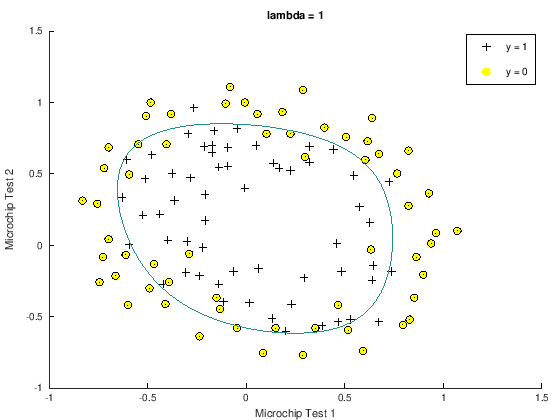

In [36]:
%% ============= Part 2: Regularization and Accuracies =============

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');

Train Accuracy: 61.016949
Expected accuracy (with lambda = 1): 83.1 (approx)


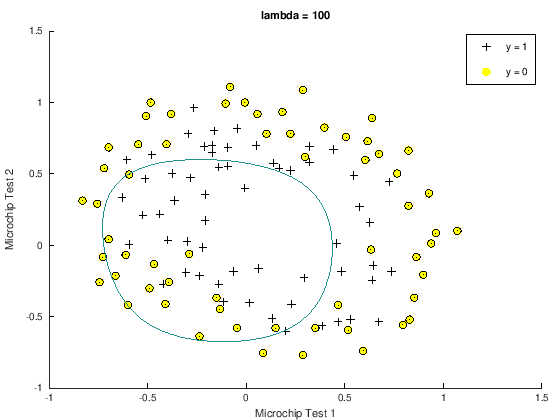

In [37]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 100;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');

Train Accuracy: 56.779661
Expected accuracy (with lambda = 1): 83.1 (approx)


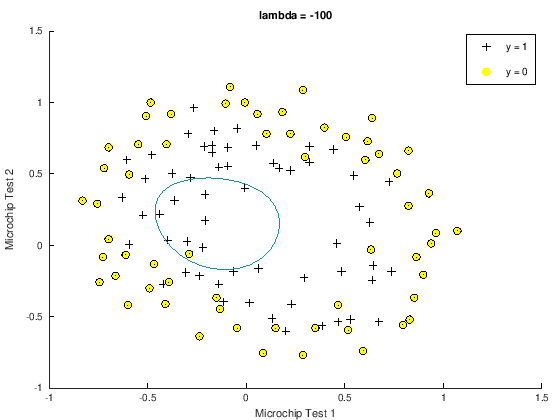

In [38]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = -100;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');

Train Accuracy: 86.440678
Expected accuracy (with lambda = 1): 83.1 (approx)


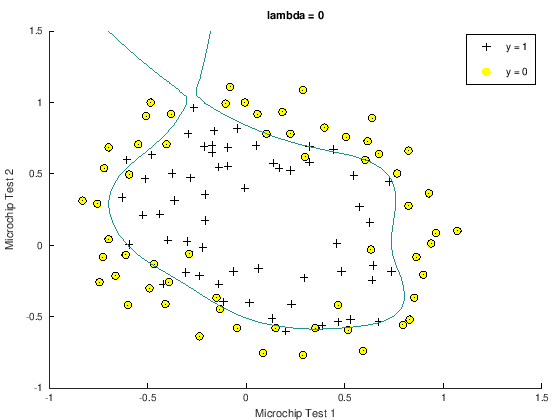

In [39]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 0;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');